<a href="https://colab.research.google.com/github/ganeshreddy10/MACHINE-LEARNING/blob/main/gini_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import accuracy_score

In [10]:
df = pd.read_csv("housing_in_london_monthly_variables.csv")

In [11]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [12]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
for col in df.columns:
  df[col] =  label_encoder.fit_transform(df[col])

In [13]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,0,6,1853,0,14,2669,1
1,1,6,1485,0,4,2669,1
2,2,6,1338,0,11,2669,1
3,3,6,1272,0,4,2669,1
4,4,6,1605,0,7,2669,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   date           13549 non-null  int64
 1   area           13549 non-null  int64
 2   average_price  13549 non-null  int64
 3   code           13549 non-null  int64
 4   houses_sold    13549 non-null  int64
 5   no_of_crimes   13549 non-null  int64
 6   borough_flag   13549 non-null  int64
dtypes: int64(7)
memory usage: 741.1 KB


In [15]:
df.isnull().sum()

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
borough_flag     0
dtype: int64

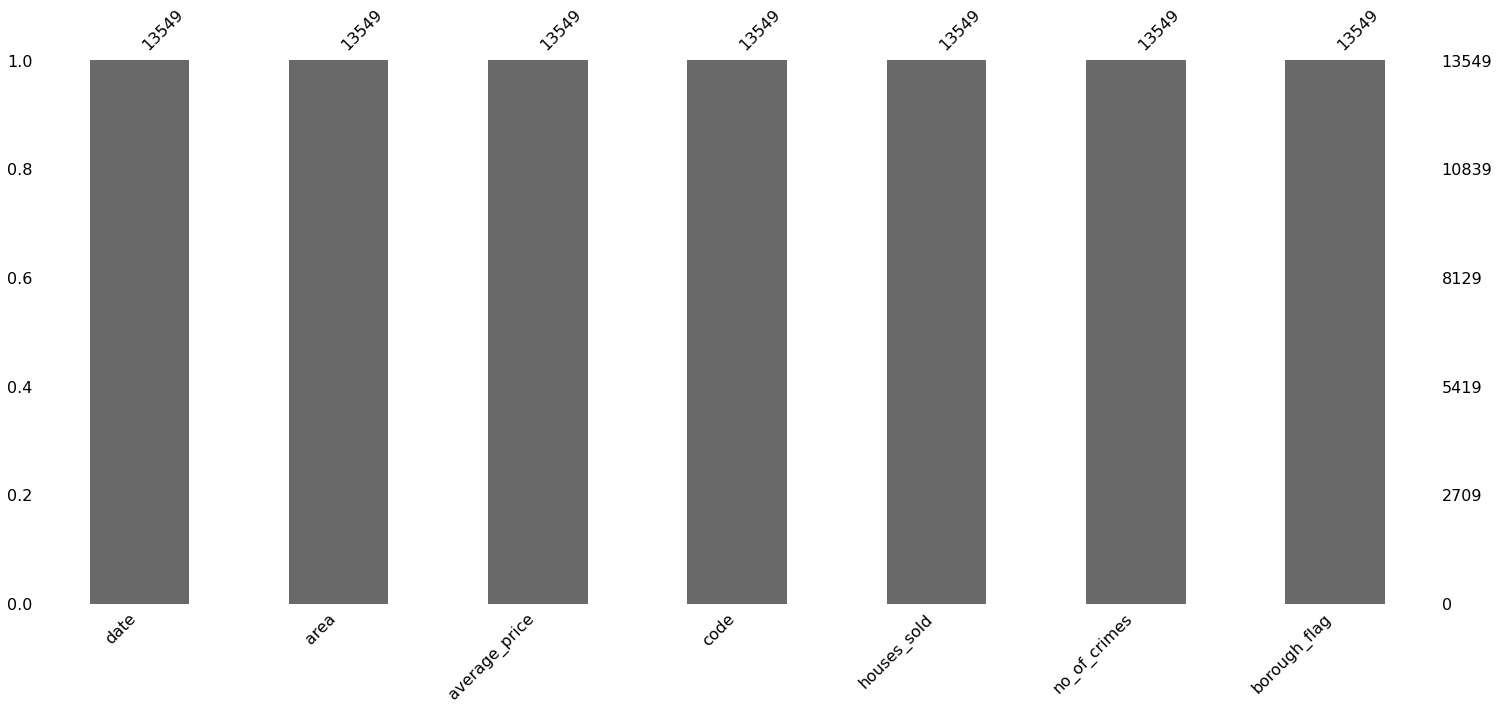

In [16]:
import missingno as msno
msno.bar(df)
plt.show()

In [20]:
x = df.drop('borough_flag', axis = 1)
y = df['borough_flag']


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5,random_state=0)

In [22]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [23]:
clf = DecisionTreeClassifier(criterion = "gini",random_state=100)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

In [24]:
y_pred = clf.predict(x_test)

In [25]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [26]:
cm = confusion_matrix(y_test,y_pred)

In [27]:
cm

array([[1809,    2],
       [   0, 4964]])

In [28]:
accuracy_score(y_test, y_pred)

0.9997047970479704

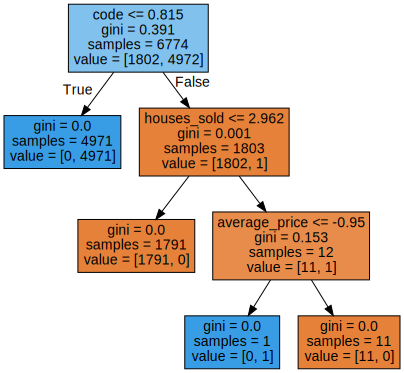

In [29]:
graphviz.Source(export_graphviz(clf,feature_names = x.columns,filled=True,))


In [30]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
